# Video Game Sales Data Challenge

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [3]:
vgsales = pd.read_csv('vgsales.csv')

In [4]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#count number of rows that have null (unknown) values
print('number of entries that have null values = ',vgsales.isnull().any(axis=1).sum())
print('percent of dataset that contain null values = ',vgsales.isnull().any(axis=1).sum()/len(vgsales))

number of entries that have null values =  307
percent of dataset that contain null values =  0.018496204361971323


In [8]:
vgsales[vgsales.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [9]:
#drop entries that contain null values since it is only ~1.8% of data
vgsales_processed = vgsales.dropna()

In [10]:
vgsales_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
vgsales_processed.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6660,6662,Just Dance Kids 2,PS3,2011.0,Misc,Ubisoft,0.10,0.10,0.00,0.04,0.25
2955,2957,Mappy,NES,1984.0,Platform,Namco Bandai Games,0.00,0.00,0.69,0.00,0.69
5527,5529,DiRT 2,PSP,2009.0,Racing,Sony Computer Entertainment,0.09,0.16,0.00,0.09,0.33
9951,9953,Get Up and Dance,Wii,2011.0,Misc,O-Games,0.06,0.04,0.00,0.01,0.12
218,219,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83
12986,12988,Piglet's Big Game,GC,2003.0,Platform,Gotham Games,0.04,0.01,0.00,0.00,0.05
14656,14659,In Cold Blood,PS,2000.0,Adventure,Sony Computer Entertainment,0.02,0.01,0.00,0.00,0.03
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
11655,11657,Frogger Beyond,XB,2002.0,Platform,Konami Digital Entertainment,0.06,0.02,0.00,0.00,0.08
13237,13239,Barnyard,GBA,2006.0,Action,THQ,0.03,0.01,0.00,0.00,0.05


In [12]:
vgsales_processed[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

In [13]:
print('genres = ',vgsales_processed.Genre.unique())
print('')
print('number unique genres = ',vgsales_processed.Genre.nunique())
print('')
print('publishers = ',vgsales_processed.Publisher.unique())
print('')
print('number unique publishers = ',vgsales_processed.Publisher.nunique())

genres =  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

number unique genres =  12

publishers =  ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Val

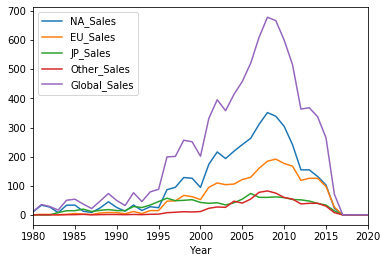

In [14]:
#After 2017, there appears to be 0 sales.  Delete all entries on and after 2017
total_sales = vgsales_processed.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
total_sales.plot()

In [15]:
total_sales[total_sales.index >= 2014]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2014.0,131.97,125.63,39.46,40.02,337.03
2015.0,102.82,97.71,33.72,30.01,264.44
2016.0,22.66,26.76,13.67,7.75,70.90
2017.0,0.00,0.00,0.05,0.00,0.05
2020.0,0.27,0.00,0.00,0.02,0.29


Based on the graphs and the table above, it looks like the data collected mid-2016.  Delete all entries from the year 2016 onwards.

In [16]:
vgsales_processed = vgsales_processed[vgsales_processed['Year'] < 2016]

In [17]:
vgsales_processed.sort_values('Year').tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10236,10238,Transformers: Devastation,PS3,2015.0,Action,Activision,0.03,0.07,0.00,0.02,0.11
3888,3890,StarCraft II: Legacy of the Void,PC,2015.0,Strategy,Activision,0.18,0.29,0.00,0.04,0.51
14601,14604,OZMAFIA!! -vivace-,PSV,2015.0,Adventure,dramatic create,0.00,0.00,0.03,0.00,0.03
12891,12893,Samurai Warriors 4-II,PSV,2015.0,Action,Tecmo Koei,0.00,0.00,0.05,0.00,0.05
13836,13838,The Sims 4: Spa Day,PC,2015.0,Simulation,Electronic Arts,0.00,0.04,0.00,0.00,0.04


In [232]:
#pandas profiling, part of EDA
pandas_profiling.ProfileReport(vgsales_processed)

Number of variables,12
Number of observations,15945
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [18]:
vgsales_processed.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
total_sales = vgsales_processed.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

Text(0.5, 1.0, 'Total Sales by Region')

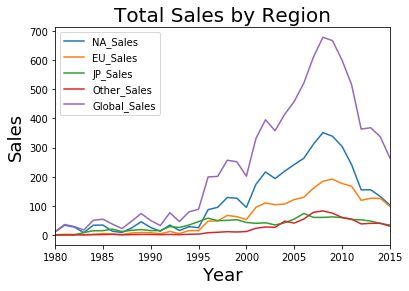

In [20]:
total_sales.plot()
plt.xlabel('Year',fontsize=18)
plt.ylabel('Sales',fontsize=18)
plt.title('Total Sales by Region',fontsize=20)

From the graph above, NA and EU sales make up most of the total sales

In [21]:
#plot proportion of global sales is each market
total_sales_proportion = total_sales[total_sales.columns[0:-1]].div(total_sales['Global_Sales'],axis='index')

Text(0.5, 1.0, 'Proportion of Total Sales by Region')

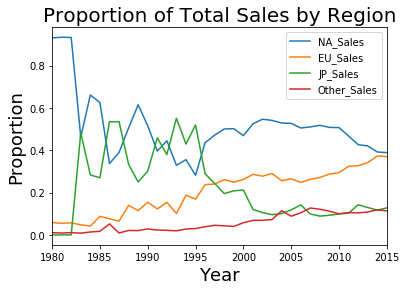

In [22]:
total_sales_proportion.plot()
plt.xlabel('Year',fontsize=18)
plt.ylabel('Proportion',fontsize=18)
plt.title('Proportion of Total Sales by Region',fontsize=20)

Proportion of total sales by year for different regions.  NA and EU sales make up the majority of sales; both at around ~40%.  JP and other regions make up the rest of the sales, nearly equally split; making up around ~10% each of total sales

## Look at each market individually

In [23]:
# get different markets
vgsales_processed_NA = vgsales_processed[vgsales_processed.columns[list(range(0,7))]]
vgsales_processed_JP = vgsales_processed[vgsales_processed.columns[list(range(0,6))+[8]]]
vgsales_processed_EU = vgsales_processed[vgsales_processed.columns[list(range(0,6))+[7]]]

In [24]:
vgsales_processed_NA.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27


In [25]:
vgsales_processed_EU.head()

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.58
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,8.89


In [26]:
vgsales_processed_JP.head()

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22


In [27]:
x = vgsales_processed_NA[['Year']].values
y_NA = vgsales_processed_NA[['NA_Sales']].values
groups = vgsales_processed_NA.groupby('Genre')

C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


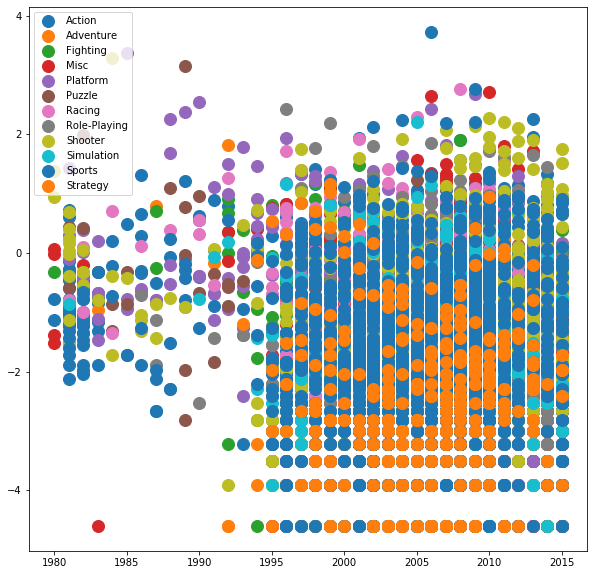

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Year, np.log(group.NA_Sales), marker='o', linestyle='', ms=12, label=name)
ax.legend()

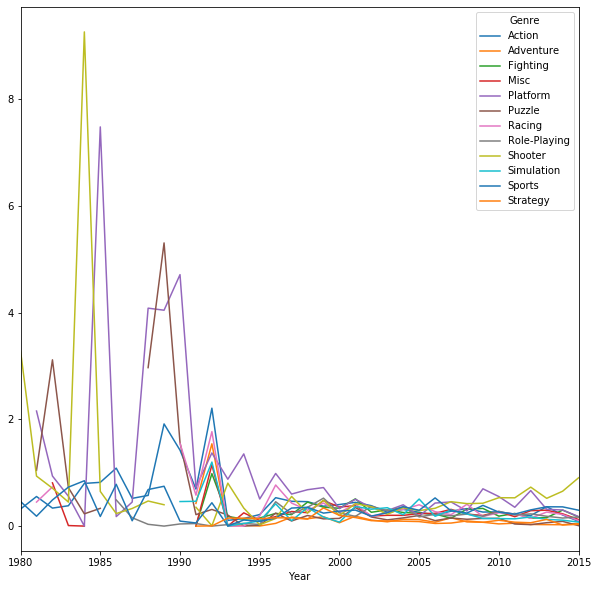

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
groups_mean = vgsales_processed_NA.groupby(['Year','Genre']).mean()['NA_Sales'].unstack().plot(
    ax=ax)

In [29]:
#fig, ax = plt.subplots(figsize=(8,8))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
vgsales_NA_total = vgsales_processed_NA.groupby(['Year','Genre']).sum()['NA_Sales'].unstack()

In [30]:
vgsales_NA_total['Total'] = vgsales_processed_NA.groupby('Year')['NA_Sales'].sum()

In [31]:
vgsales_NA_total.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Year,,,,,,,,,,,,,
1980.0,0.32,NaN,0.72,2.53,NaN,NaN,NaN,NaN,6.56,NaN,0.46,NaN,10.59
1981.0,13.86,NaN,NaN,NaN,6.47,2.09,0.45,NaN,9.37,0.42,0.74,NaN,33.40
1982.0,6.07,NaN,NaN,0.81,4.69,9.35,1.47,NaN,3.55,NaN,0.98,NaN,26.92
1983.0,2.67,0.38,NaN,0.01,2.80,0.72,NaN,NaN,0.45,NaN,0.73,NaN,7.76
1984.0,0.80,NaN,NaN,0.00,0.00,0.69,2.30,NaN,27.79,NaN,1.70,NaN,33.28


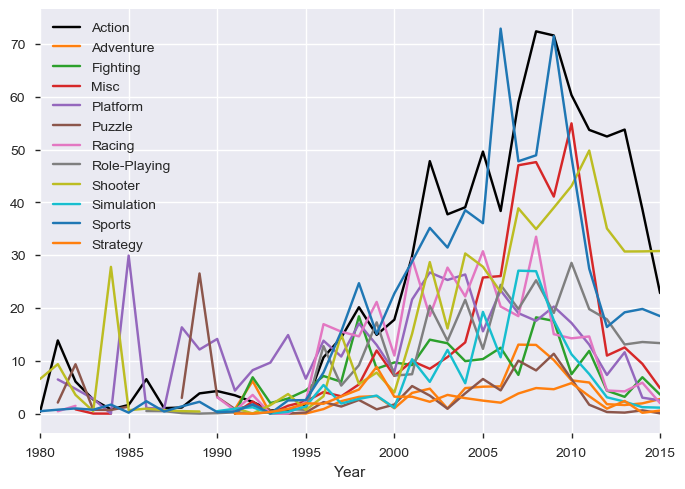

In [299]:
ax = vgsales_NA_total[vgsales_NA_total.columns[0:-1]].plot()
ax.lines[0].set_color('black')
ax.legend()

In [277]:
vgsales_NA_proportion = vgsales_NA_total[vgsales_NA_total.columns[0:-1]].div(vgsales_NA_total['Total'],axis='index')

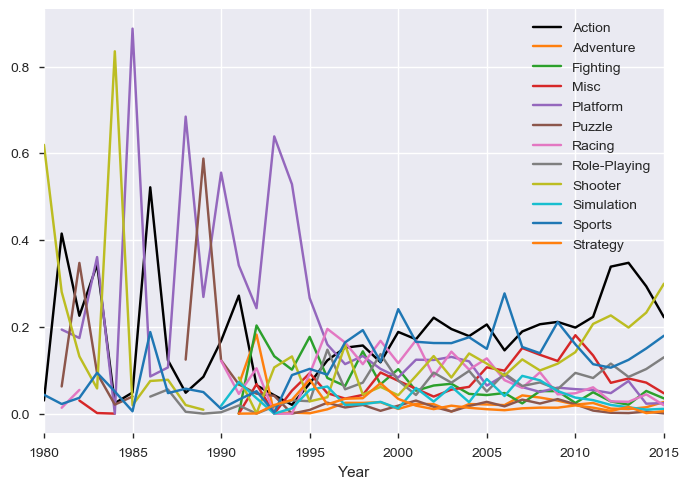

In [300]:
ax = vgsales_NA_proportion.plot()
ax.lines[0].set_color('black')
ax.legend()

For NA, the current trend is that action and shooter games make up the highest proportion of sales.  Recently shooting games are gaining in popularity in recent years.  Action games are decreasing in popularity in recent years.  Sports and role playing games are also increasing in popularity in recent years.

In [306]:
#vgsales_NA_total_publisher = vgsales_processed_NA.groupby(['Year','Publisher']).sum()['NA_Sales'].unstack()
#vgsales_NA_total_publisher['Total'] = vgsales_processed_NA.groupby('Year')['NA_Sales'].sum()

In [312]:
#vgsales_NA_total_publisher.head()

In [359]:
vgsales_popular_publisher_NA = pd.DataFrame(vgsales_processed_NA.groupby(['Year','Publisher'])['NA_Sales'].sum().unstack().idxmax(axis=1))
vgsales_popular_publisher_NA.rename(columns={0:'Most_Popular_Publisher'},inplace=True)

In [361]:
vgsales_popular_publisher_NA.head()

,Most_Popular_Publisher
Year,
1980.0,Atari
1981.0,Activision
1982.0,Atari
1983.0,Atari
1984.0,Nintendo


In [294]:
vgsales_EU_total = vgsales_processed_EU.groupby(['Year','Genre']).sum()['EU_Sales'].unstack()

In [295]:
vgsales_EU_total['Total'] = vgsales_processed_EU.groupby('Year')['EU_Sales'].sum()

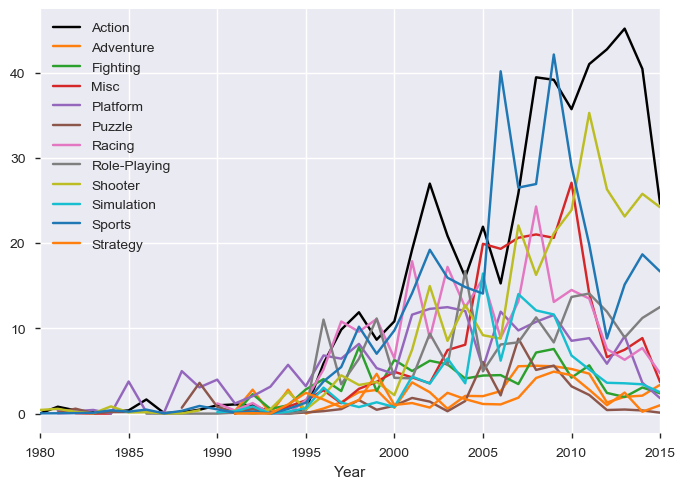

In [301]:
ax = vgsales_EU_total[vgsales_EU_total.columns[0:-1]].plot()
ax.lines[0].set_color('black')
ax.legend()

For EU.  Recently, there has a sharp decrease in proportion of sales of action games.  Shooting games have also stagnated in proportion of sales.  Sports games also decreased in proportion to sales.  Relatively speaking, role-playing games have increased in proportion.

In [302]:
vgsales_JP_total = vgsales_processed_JP.groupby(['Year','Genre']).sum()['JP_Sales'].unstack()
vgsales_JP_total['Total'] = vgsales_processed_JP.groupby('Year')['JP_Sales'].sum()

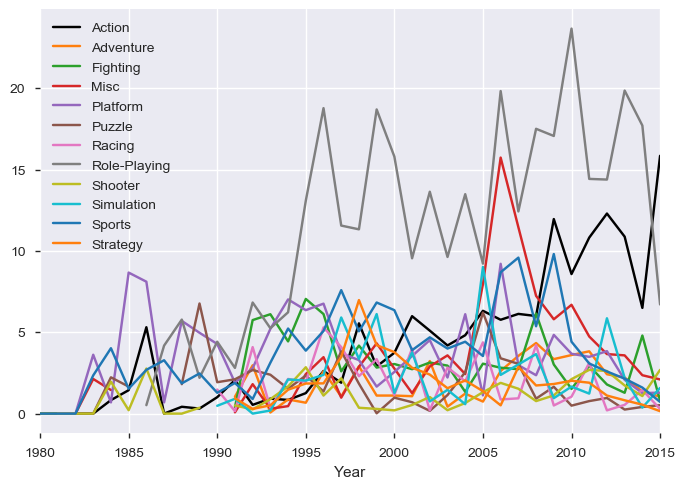

In [303]:
ax = vgsales_JP_total[vgsales_JP_total.columns[0:-1]].plot()
ax.lines[0].set_color('black')
ax.legend()

For JP market, role playing games dominated the sales, until most recently drastically declined.  Action games have sharply increased in proportion of sales.  In this marke, role-playing and action games dominate.

Text(0.5, 1.0, 'Video Game Sales in North America')

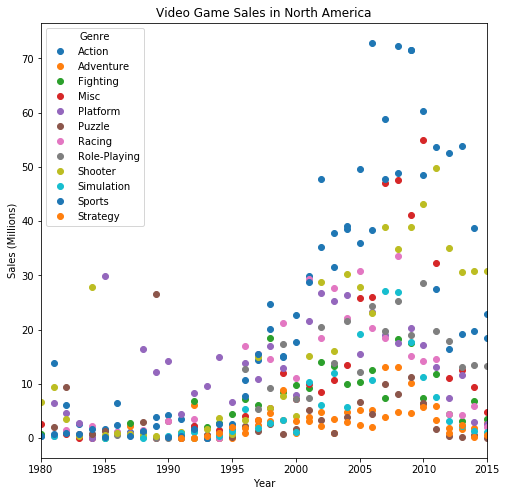

In [197]:
fig, ax = plt.subplots(figsize=(8,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
vgsales_processed_NA.groupby(['Year','Genre']).sum()['NA_Sales'].unstack().plot(
    ax=ax,style='o')
plt.ylabel('Sales (Millions)')
plt.title('Video Game Sales in North America')

Text(0.5, 1.0, 'Video Game Sales in Europe')

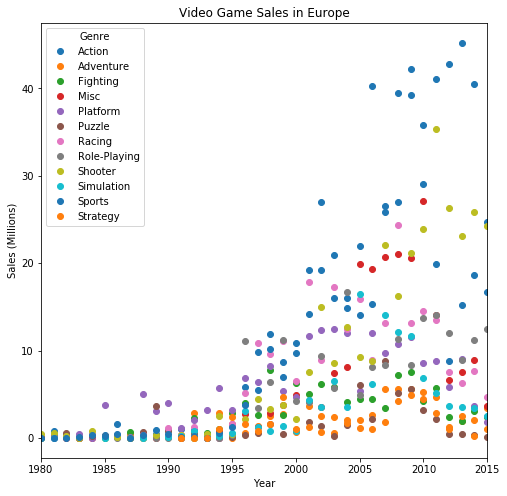

In [198]:
fig, ax = plt.subplots(figsize=(8,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
vgsales_processed_EU.groupby(['Year','Genre']).sum()['EU_Sales'].unstack().plot(
    ax=ax,style='o')
plt.ylabel('Sales (Millions)')
plt.title('Video Game Sales in Europe')

Text(0.5, 1.0, 'Video Game Sales in Japan')

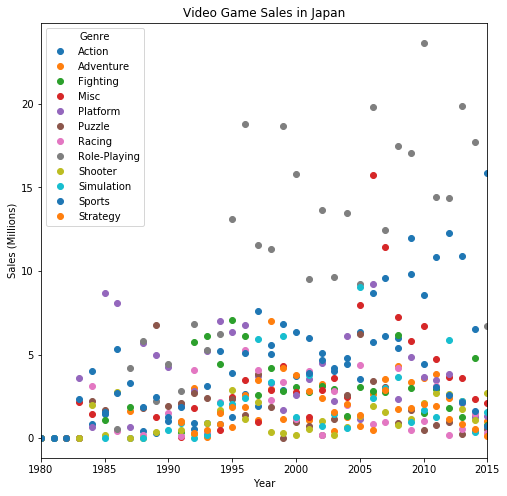

In [199]:
fig, ax = plt.subplots(figsize=(8,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
vgsales_processed_JP.groupby(['Year','Genre']).sum()['JP_Sales'].unstack().plot(
    ax=ax,style='o')
plt.ylabel('Sales (Millions)')
plt.title('Video Game Sales in Japan')

## What important features influence sales?